In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
plt.style.use('dark_background')

In [2]:
epoch=40

### Load the dataset

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

 y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
y_test = y_test.reshape(-1,)


### Normalizing the  data


we have to rescale the pixel values in range 0 - 1 inclusive.

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

###  Data augmentation

Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data.For preventing model from overfitting and  improving the model accuracy we used Data augmentation. 

In [7]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(32, 
                                                              32,
                                                              3)),
    
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# Neural Network Architecture ( with TOP-1 and ReLU)

The images are of size 32 x 32. we convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 32 x 32 x 3, and feed this as an input to the network.

we used four convolutional layers and two fully-connected layers:

The first layer will have 32-3 x 3 filters, response-normalized and pooled. The second layer will have 32-3 x 3 filters, response-normalized and pooled. The third layer will have 64-3 x 3 filters, without any intervening pooling or normalization layers and The fourth layer will have 64-3 x 3 filters,pooled. There are three max-pooling layers each of size 2 x 2 and dropout with a rate of 0.2 for first and second and with a rate of 0.4 for fourth layers. Response-normalization layers follow the first and second convolutional layers. The ReLU non-linearity is applied to the output of every convolutional and fully-connected layer. The first fully-connected layer has 64 neurons. We used dropout with a rate of 0.5. The output of the last fully connected layer is fed to a softmax also for Improvimg Test Accuracy we used Data Augmentation.

In [8]:
activation = 'relu'
cnn = models.Sequential([
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activation, input_shape=(32, 32, 3)),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activation),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activation),
   
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activation),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(64, activation=activation),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

### Compile the Model with TOP-1 error

After the model is created, we compile it using the SGD optimizer, one of the most popular optimization algorithms. Additionally, we specify the loss type which is categorical cross entropy which is used for multi-class classification, we can also use binary cross-entropy as the loss function. Lastly, we specify the metrics as accuracy with TOP-1 error which we want to analyze while the model is training.

In [9]:
opt = tf.keras.optimizers.SGD( learning_rate=0.01,
    momentum=0.9,
   # weight_decay=0.0005   
)


cnn.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Let's visualize the layers that we created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in our model.

In [10]:
print(cnn.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 lambda (Lambda)             (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                      

### Train the Model

It's finally time to train the model with Keras' fit() function! The model trains for 40 epochs. The fit() function will return a historyrelutop1 object; By storying the result of this function in historyrelutop1, we can use it later to plot the accuracy and loss function plots between training and validation which will help us to analyze our model's performance visually.

In [11]:
historyrelutop1 =cnn.fit(X_train, y_train, epochs=epoch, validation_data = (X_test, y_test))

Epoch 1/40
1563/1563 [==============================] - 81s 47ms/step - loss: 2.1127 - accuracy: 0.1895 - val_loss: 1.8402 - val_accuracy: 0.3024
Epoch 2/40
1563/1563 [==============================] - 78s 50ms/step - loss: 1.8688 - accuracy: 0.3003 - val_loss: 1.6436 - val_accuracy: 0.3746
Epoch 3/40
1563/1563 [==============================] - 77s 50ms/step - loss: 1.7404 - accuracy: 0.3574 - val_loss: 1.6008 - val_accuracy: 0.3994
Epoch 4/40
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6755 - accuracy: 0.3844 - val_loss: 1.4765 - val_accuracy: 0.4698
Epoch 5/40
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6150 - accuracy: 0.4120 - val_loss: 1.3464 - val_accuracy: 0.5017
Epoch 6/40
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5833 - accuracy: 0.4290 - val_loss: 1.3573 - val_accuracy: 0.5007
Epoch 7/40
1563/1563 [==============================] - 76s 49ms/step - loss: 1.5554 - accuracy: 0.4437 - val_loss: 1.3845 -

Finally! we trained the model for 40 epochs, and by observing the training accuracy and loss, we can say that the model did a good job since after 40 epochs the training accuracy is 54.25% and the training loss is quite low.

However, the validation loss is 1.0960  and the validation accuracy is 61.75%. Overfitting gives an intuition that the network has memorized the training data very well but is not guaranteed to work on unseen data, and that is why there is a difference in the training and validation accuracy.

### Model Evaluation(TOP-1) on the Test Set

In [12]:
cnn.evaluate(X_test, y_test)
scorerelutop1 = cnn.evaluate(X_test, y_test, verbose=1)
print('n''CNN Model(with Relu) Test accuracy( TOP-1):', scorerelutop1[1])

313/313 [==============================] - 4s 12ms/step - loss: 1.0960 - accuracy: 0.6175
nCNN Model(with Relu) Test accuracy( TOP-1): 0.6175000071525574


# plot the training and validation accuracy(TOP-1) and loss at each epoch

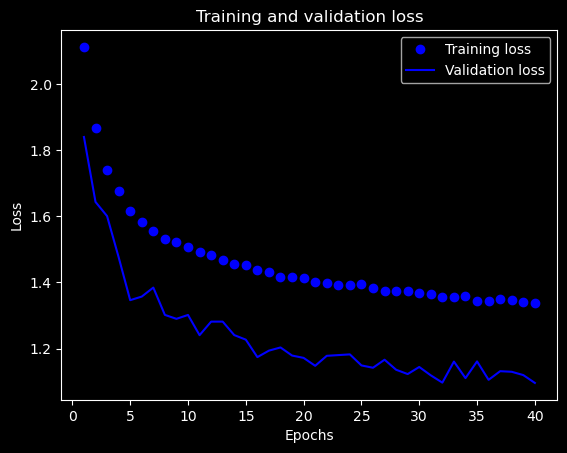

In [13]:
loss = historyrelutop1.history['loss']
val_loss = historyrelutop1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

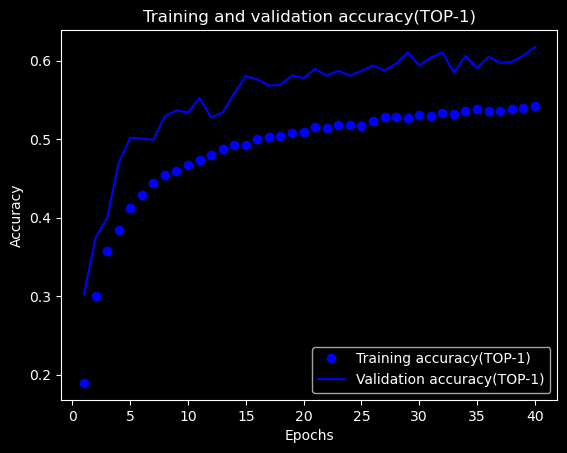

In [14]:
accuracy = historyrelutop1.history['accuracy']
val_accuracy = historyrelutop1.history['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training accuracy(TOP-1)')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy(TOP-1)')
plt.title('Training and validation accuracy(TOP-1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

we can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

Therefore, we can say that our model's generalization capability became much better since the loss on both test set and validation set was only slightly more compared to the training loss.

# Neural Network Architecture ( with TOP-5 and ReLU)

In [15]:
activation = 'relu'
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activation, input_shape=(32, 32, 3)),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activation),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activation),
   
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activation),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(64, activation=activation),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

### Compile the Model with TOP-5 error

we used top-5 error where the top-5 error rate is the fraction of test images for which the correct label is not among the five labels considered most probable by the model.

In [16]:
opt = tf.keras.optimizers.SGD( learning_rate=0.01,
    momentum=0.9,
   # weight_decay=0.0005   
)   
acc= tf.keras.metrics.TopKCategoricalAccuracy(k=5) #top-5 error
cnn.compile(optimizer = opt,loss = 'sparse_categorical_crossentropy', metrics = acc)

### Train the Model

In [17]:
historyrelutop5 = cnn.fit(X_train, y_train, epochs=epoch, validation_data = (X_test, y_test))

Epoch 1/40
1563/1563 [==============================] - 55s 35ms/step - loss: 2.0681 - top_k_categorical_accuracy: 0.3952 - val_loss: 1.7346 - val_top_k_categorical_accuracy: 0.4410
Epoch 2/40
1563/1563 [==============================] - 59s 38ms/step - loss: 1.7449 - top_k_categorical_accuracy: 0.4321 - val_loss: 1.6277 - val_top_k_categorical_accuracy: 0.3193
Epoch 3/40
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5789 - top_k_categorical_accuracy: 0.4584 - val_loss: 1.3885 - val_top_k_categorical_accuracy: 0.5007
Epoch 4/40
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4921 - top_k_categorical_accuracy: 0.4853 - val_loss: 1.3228 - val_top_k_categorical_accuracy: 0.4246
Epoch 5/40
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4291 - top_k_categorical_accuracy: 0.4915 - val_loss: 1.2910 - val_top_k_categorical_accuracy: 0.3860
Epoch 6/40
1563/1563 [==============================] - 60s 38ms/step - loss: 1.3808 - top

### Model Evaluation(TOP-5) on the Test Set

In [30]:
cnn.evaluate(X_test, y_test)
scorerelutop5 = cnn.evaluate(X_test, y_test, verbose=1)
print('n''CNN Model(with Relu) Test accuracy( TOP-5):', scorerelutop5[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.9137 - top_k_categorical_accuracy: 0.4525
nCNN Model(with Relu) Test accuracy( TOP-5): 0.45249998569488525


# Changing activation function to tanh instead of Relu in the Network

In [19]:
activation = 'tanh'
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activation, input_shape=(32, 32, 3)),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activation),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activation),
   
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activation),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(64, activation=activation),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

###  Compile the Model with TOP-1 error(  with tanh activation)

In [20]:
opt = tf.keras.optimizers.SGD( learning_rate=0.01,
    momentum=0.9,
   # weight_decay=0.0005   
)


cnn.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
historytanhtop1 =cnn.fit(X_train, y_train, epochs=epoch, validation_data = (X_test, y_test))

Epoch 1/40
1563/1563 [==============================] - 58s 37ms/step - loss: 1.7980 - accuracy: 0.3331 - val_loss: 1.5544 - val_accuracy: 0.4405
Epoch 2/40
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5408 - accuracy: 0.4432 - val_loss: 1.4267 - val_accuracy: 0.4779
Epoch 3/40
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4448 - accuracy: 0.4839 - val_loss: 1.2847 - val_accuracy: 0.5458
Epoch 4/40
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3805 - accuracy: 0.5108 - val_loss: 1.2066 - val_accuracy: 0.5797
Epoch 5/40
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3403 - accuracy: 0.5294 - val_loss: 1.1946 - val_accuracy: 0.5808
Epoch 6/40
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2980 - accuracy: 0.5479 - val_loss: 1.1361 - val_accuracy: 0.5975
Epoch 7/40
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2668 - accuracy: 0.5625 - val_loss: 1.0980 -

In [22]:
cnn.evaluate(X_test, y_test)
scoretanhtop1 = cnn.evaluate(X_test, y_test, verbose=1)
print('n''CNN Model(with tanh) Test accuracy( TOP-1):', scoretanhtop1[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.8428 - accuracy: 0.7092
nCNN Model(with Relu) Test accuracy( TOP-1): 0.7092000246047974


# plot the training accuracy(TOP-1) and loss  with ReLU and tanh at each epoch

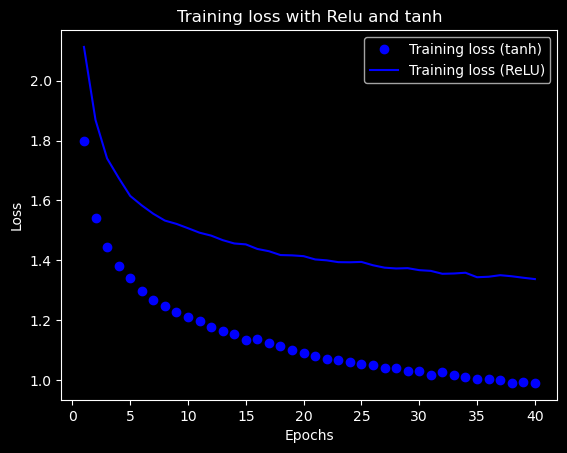

In [33]:
loss = historytanhtop1.history['loss']
val_loss = historyrelutop1.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss (tanh)')
plt.plot(epochs, val_loss, 'b', label='Training loss (ReLU)')
plt.title('Training loss with Relu and tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

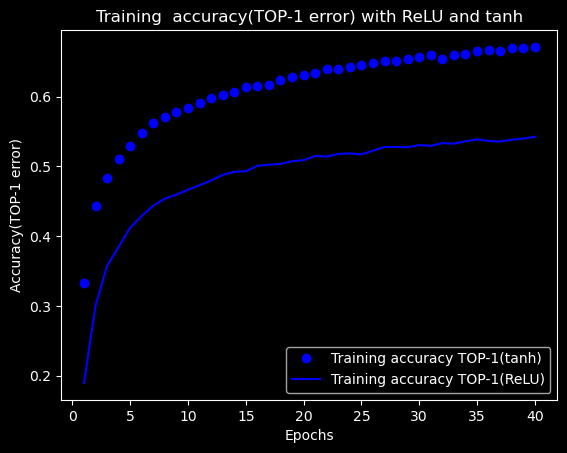

In [24]:
accuracy = historytanhtop1.history['accuracy']
val_accuracy = historyrelutop1.history['accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training accuracy TOP-1(tanh)')
plt.plot(epochs, val_accuracy, 'b', label='Training accuracy TOP-1(ReLU)')
plt.title('Training  accuracy(TOP-1 error) with ReLU and tanh')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(TOP-1 error)')
plt.legend()
plt.show()

### Compile the Model with TOP-5 error(  with tanh activation)

In [25]:
activation = 'tanh'
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activation, input_shape=(32, 32, 3)),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activation),
    layers.Lambda(tf.nn.local_response_normalization),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activation),
   
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activation),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(64, activation=activation),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

In [26]:
opt = tf.keras.optimizers.SGD( learning_rate=0.01,
    momentum=0.9,
   # weight_decay=0.0005   
)   
acc= tf.keras.metrics.TopKCategoricalAccuracy(k=5) #top-5 error
cnn.compile(optimizer = opt,loss = 'sparse_categorical_crossentropy', metrics = acc)

In [27]:
historytanhtop5 =cnn.fit(X_train, y_train, epochs=epoch, validation_data = (X_test, y_test))

Epoch 1/40
1563/1563 [==============================] - 60s 38ms/step - loss: 1.8100 - top_k_categorical_accuracy: 0.4393 - val_loss: 1.4720 - val_top_k_categorical_accuracy: 0.4595
Epoch 2/40
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5484 - top_k_categorical_accuracy: 0.4417 - val_loss: 1.3662 - val_top_k_categorical_accuracy: 0.4012
Epoch 3/40
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4511 - top_k_categorical_accuracy: 0.4514 - val_loss: 1.4097 - val_top_k_categorical_accuracy: 0.2807
Epoch 4/40
1563/1563 [==============================] - 60s 39ms/step - loss: 1.3814 - top_k_categorical_accuracy: 0.4505 - val_loss: 1.1554 - val_top_k_categorical_accuracy: 0.4197
Epoch 5/40
1563/1563 [==============================] - 60s 39ms/step - loss: 1.3408 - top_k_categorical_accuracy: 0.4557 - val_loss: 1.1407 - val_top_k_categorical_accuracy: 0.4153
Epoch 6/40
1563/1563 [==============================] - 60s 39ms/step - loss: 1.3059 - top

In [28]:
cnn.evaluate(X_test, y_test)
scoretanhtop5 = cnn.evaluate(X_test, y_test, verbose=1)
print('n''CNN Model(with tanh) Test accuracy( TOP-5):', scoretanhtop5[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.9137 - top_k_categorical_accuracy: 0.4525
nCNN Model(with Relu) Test accuracy( TOP-5): 0.45249998569488525


# Comparing Model Accuracies( TOP-1 and TOP-5) for both CNNS with different activators

After implementing two models with different activators and acquiring their scores, comparing them is a must to reach a final statement. The below-mentioned code will present a table format stating the models from best to least accuracies.

In [29]:
import pandas as pd
results=pd.DataFrame({'Model':['CNN(Relu)','CNN (tanh)'],
                     'Accuracy Score(TOP-1)':[scorerelutop1[1],scoretanhtop1[1]], 
                      'Accuracy Score(TOP-5)':[scorerelutop5[1],scoretanhtop5[1]]})
result_df=results.sort_values(by='Accuracy Score(TOP-1)',  ascending=False)
result_df=results.sort_values(by='Accuracy Score(TOP-5)', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score(TOP-1),Accuracy Score(TOP-5)
Model,,
CNN (tanh),0.7092,0.4525
CNN(Relu),0.6175,0.4298


The table generated above states that Our network with ReLU activation achieves top-1 and top-5 test set error rates of 61.75%
and 42.98%, respectively, while the CNN with tanh activation leads the prediction with a maximum accuracy score (TOP-1) 70.92% and with a minimum accuracy score (TOP-5) 45.25%


